## Input: 2mV, 8ns rise time, 50ns fall time
## Output:
<img src="pulse_with_gate.png" alt="Drawing" style="width: 1000px;"/>

## Spectrum with 200ns gate
<img src="2mv.png" alt="Drawing" style="width: 1000px;"/>

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [3]:
def gauss(x,a,mu,sigma):
    return a*np.exp(-(x-mu)**2/(2*sigma**2))

In [4]:
def plot_fit_data(data,xlims,popt):
    x = data[:,0][xlims[0]:xlims[1]]
    y = data[:,1][xlims[0]:xlims[1]]
    fig = plt.figure(figsize=(10,6))
    ax = fig.gca()
    ax.plot(x,y, alpha=0.7, color='r');
    ax.plot(x,gauss(x,*popt), color='black')
    ax.set_xlabel('ADC', fontsize=16)
    ax.set_ylabel('Counts', fontsize=16)
    ax.tick_params(length=8, width=1, labelsize=16)

In [5]:
def plot_linear_fit(x,y,errs):
    res = np.polyfit(x, y, 1, w=1./errs)
    fig = plt.figure(figsize=(10,6))
    ax = fig.gca()
    ax.errorbar(x,y,yerr=errs,fmt='.');
    x_plot = np.linspace(0,18,1000)
    ax.plot(x_plot,res[0]*x_plot+res[1])
    ax.set_xlim([0,18])
    ax.set_ylim([0,14000])
    ax.set_xlabel('Input Amplitude (mV)', fontsize=16)
    ax.set_ylabel('Peak Position (ADC)', fontsize=16)
    ax.tick_params(length=8, width=1, labelsize=16)

In [6]:
two_mv = np.genfromtxt('2mv_001_eh_0.dat') #[1000,3000]
four_mv = np.genfromtxt('4mv_003_eh_0.dat') #[2500,5000]
six_mv = np.genfromtxt('6mv_004_eh_0.dat')  #[4000,6500]
eight_mv = np.genfromtxt('8mv_005_eh_0.dat') #[5500,8500]
sixteen_mv = np.genfromtxt('16mv_006_eh_0.dat') #[9000,13000]

In [7]:
list_data = [two_mv, four_mv, six_mv, eight_mv, sixteen_mv]
list_lims = [[1000,3000],[2500,5000],[4000,6500],[5500,8500],[9000,13000]]
p0_guesses = [[150,2000,100],[130,3500,120],[100,5000,140],[80,6500,150],[60,11000,180]]
voltages = [2,4,6,8,16]
popt_list = []
for d,xlim,p0 in zip(list_data, list_lims, p0_guesses):
    x = d[:,0][xlim[0]:xlim[1]]
    y = d[:,1][xlim[0]:xlim[1]]
    popt,_ = curve_fit(gauss, x, y, p0)
    popt_list.append(popt)
popt_list = np.array(popt_list)

# Fit:

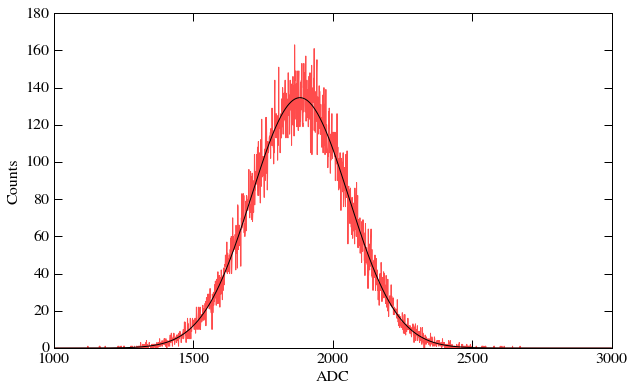

In [8]:
plot_fit_data(two_mv, [1000,3000], popt_list[0])

# Take a few spectra at various voltages (2, 4, 6, 8, 16) mV, and determine linearity of the output:

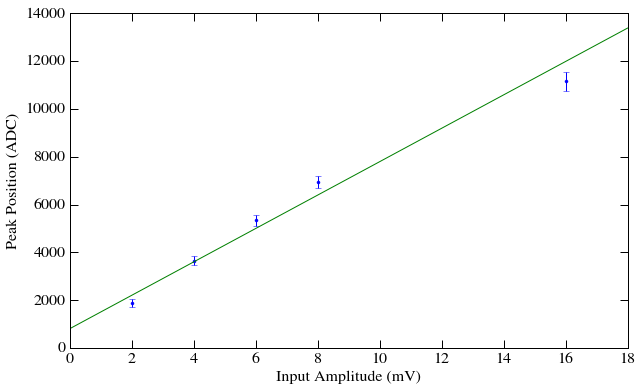

In [9]:
plot_linear_fit(voltages,popt_list[:,1],popt_list[:,2])

# Point on the right (16mV) looks off

## Input: 16mV, 8ns rise time, 50ns fall time
## Output:
<img src="pulse_with_gate_16mv.png" alt="Drawing" style="width: 1000px;"/>

# Signal getting clipped

# Spectrum does not look gaussian:

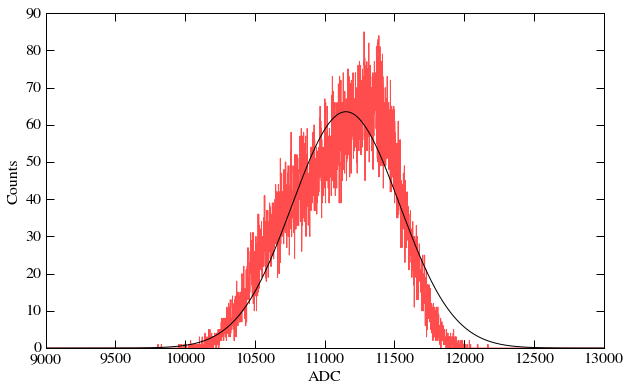

In [10]:
plot_fit_data(sixteen_mv, [9000,13000], popt_list[-1])

# Linearity fit with only the first 4 points:

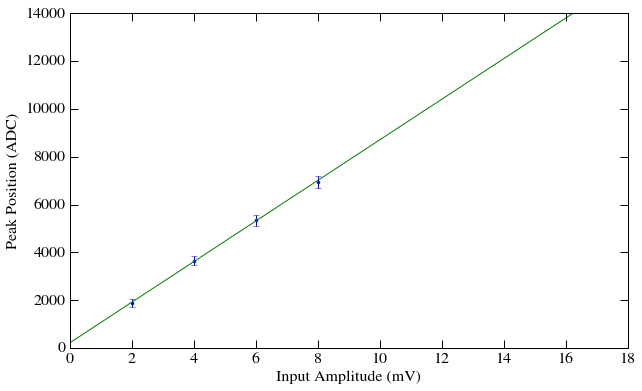

In [11]:
plot_linear_fit(voltages[:-1],popt_list[:,1][:-1],popt_list[:,2][:-1])